<a href="https://colab.research.google.com/github/diegocontadorgf/Learning/blob/main/Delincuencia_Mexico_Modelo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>
    Análisis de Incidencia Delictiva Municipial por tipo de Delito 2015-2024 y el desarrollo de un modelo predictivo
</h1>
<h2>
    Autor: Diego González Farias
</h2>

El siguiente proyecto de investigación se basa en los datos obtenidos en [Datos Abiertos Gobierno de México](https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva) con la finalidad de realizar un modelo que pueda predecir la cantidad de delitos que ocurrirán por entidad, así como su tipo de delito, basado en datos históricos de delincuencia municipal mensual de 2015 a octubre de 2024.


## Análisis exploratorio de Datos

### Carga de datos y transformacion

De manera inicial se busca el conocer los datos con los que se trabajara para poder visualizar datos estadísticos descriptivos, tendencias, relaciones e identificar las principales variables que se usaran en la creación del modelo predictivo.

In [1]:
#Importo librerias inicialmente para EDA o Exploratory Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import warnings

warnings.filterwarnings("ignore")
import folium
from folium.plugins import HeatMap

In [24]:
#Extraemos el archivo

data_delic = pd.read_csv("IDM_NM_oct24.csv", encoding='latin-1')  # Prueba con 'latin-1'


In [25]:
#Visualizamos las primeras filas del archivo
data_delic.head()


,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,1,0,1,1,0,2,1,0.0,1.0
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,0,1,0,1,0,0,0.0,0.0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,1,3,2,0,1,2,0,0.0,0.0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,...,0,1,0,0,0,0,0,0,0.0,0.0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,1,0,0,0,0,0,0.0,0.0


In [4]:
data_delic.shape

(185123, 21)

In [5]:
#Columnas de las cuales se compone el archivo
data_delic.columns

Index(['Año', 'Clave_Ent', 'Entidad', 'Cve. Municipio', 'Municipio',
       'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito',
       'Modalidad', 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
       'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
      dtype='object')

In [6]:
#Información de como esta compuesto el archivo
data_delic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185123 entries, 0 to 185122
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Año                     185123 non-null  int64  
 1   Clave_Ent               185123 non-null  int64  
 2   Entidad                 185123 non-null  object 
 3   Cve. Municipio          185123 non-null  int64  
 4   Municipio               185123 non-null  object 
 5   Bien jurídico afectado  185123 non-null  object 
 6   Tipo de delito          185122 non-null  object 
 7   Subtipo de delito       185122 non-null  object 
 8   Modalidad               185122 non-null  object 
 9   Enero                   185122 non-null  float64
 10  Febrero                 185122 non-null  float64
 11  Marzo                   185122 non-null  float64
 12  Abril                   185122 non-null  float64
 13  Mayo                    185122 non-null  float64
 14  Junio               

In [26]:
#Identificar los años incluidos
data_delic["Año"].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

El archivo incluye los meses en cada columna con un formato ancho ("wide"), sin embargo para realizar el análisis de datos es conveniente tener los meses como filas para poder crear visualizaciones y modelado.

In [27]:

#Se realiza una división por Mes y se agrega una columna que muestra la "Cantidad" de delitos según cada modalidad

data_delic_long = pd.melt(
    data_delic,
    id_vars=[
        "Año", "Clave_Ent", "Entidad", "Cve. Municipio", "Municipio",
        "Bien jurídico afectado", "Tipo de delito", "Subtipo de delito", "Modalidad"
    ],
    value_vars=[
        "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio",
        "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
    ],
    var_name="Mes",
    value_name="Cantidad"
)




In [28]:
# Se realizara un "mapeo" para poder representar los meses de manera numerica
meses = {
    "Enero": 1, "Febrero": 2, "Marzo": 3, "Abril": 4, "Mayo": 5, "Junio": 6,
    "Julio": 7, "Agosto": 8, "Septiembre": 9, "Octubre": 10, "Noviembre": 11, "Diciembre": 12
}

# Mapear los nombres de los meses a números
data_delic_long["Mes"] = data_delic_long["Mes"].map(meses)

In [29]:
data_delic_long.head()


,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Mes,Cantidad
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,1,2.0
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1.0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,1,0.0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,1.0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,1,0.0


In [30]:
data_delic_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27828864 entries, 0 to 27828863
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Año                     int64  
 1   Clave_Ent               int64  
 2   Entidad                 object 
 3   Cve. Municipio          int64  
 4   Municipio               object 
 5   Bien jurídico afectado  object 
 6   Tipo de delito          object 
 7   Subtipo de delito       object 
 8   Modalidad               object 
 9   Mes                     int64  
 10  Cantidad                float64
dtypes: float64(1), int64(4), object(6)
memory usage: 2.3+ GB


In [31]:
#Realizaremos un tipo de dato que optimize la tabla por la cantidad de filas generadas


data_delic_long = data_delic_long.astype({
    "Año": "int16",  # Rango suficiente para años
    "Clave_Ent": "int8",  # Rango suficiente para claves de entidad (0-255)
    "Cve. Municipio": "int16",  # Rango suficiente para municipios
    "Mes": "int8",  # Solo valores de 1 a 12
    "Cantidad": "float32"  # Reducir el tamaño de los flotantes
})


categorical_columns = [
    "Entidad", "Municipio", "Bien jurídico afectado",
    "Tipo de delito", "Subtipo de delito", "Modalidad"
]
data_delic_long[categorical_columns] = data_delic_long[categorical_columns].astype("category")


In [32]:
#El formato ancho constaba de 21 columnas y 2,319,072 filas
data_delic.shape

(2319072, 21)

In [33]:
#El formato "largo" a usarse consta de 11 columnas y 278,288,864 filas
data_delic_long.shape

(27828864, 11)

In [34]:
data_delic_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27828864 entries, 0 to 27828863
Data columns (total 11 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Año                     int16   
 1   Clave_Ent               int8    
 2   Entidad                 category
 3   Cve. Municipio          int16   
 4   Municipio               category
 5   Bien jurídico afectado  category
 6   Tipo de delito          category
 7   Subtipo de delito       category
 8   Modalidad               category
 9   Mes                     int8    
 10  Cantidad                float32 
dtypes: category(6), float32(1), int16(2), int8(2)
memory usage: 451.3 MB


La transformación realizada de formato "ancho" a "largo" redujo el numero de columnas en -10 pero realizo un aumento de filas en 276 millones aprox.


Dado que estamos trabajando con datos temporales se crea la columna "Fecha" para representar el tiempo en que sucede cada fila.
El día no se encuentra presente en el set de datos por lo que se pondra por default el primero de cada mes.

In [35]:
data_delic_long["Fecha"] = pd.to_datetime(
    data_delic_long["Año"].astype(str) + '-' + data_delic_long["Mes"].astype(str) + '-01',
    format='%Y-%m-%d',  # Formato año-mes-día
    errors="coerce"  # Coerción de errores en caso de valores mal formados
)




In [36]:

#Existia un ruido visual en los datos al gráficar por lo que se filtra todas las fechas posterioes a octubre 2024
data_delic_long = data_delic_long[data_delic_long["Fecha"] <= "2024-10-31"]


### Composición de los datos

Para conocer los datos vamos a comenzar respondiendo preguntas como ¿Cuantos tipos de delitos están registrados?, ¿Cuales son los delitos con más frecuencia? ,etc...

In [37]:
columnas_interes = [
    "Entidad",
    "Municipio",
    "Bien jurídico afectado",
    "Tipo de delito",
    "Subtipo de delito",
    "Modalidad"
]

conteo_unicos = data_delic_long[columnas_interes].nunique()

print(conteo_unicos)

Entidad                     32
Municipio                 2334
Bien jurídico afectado       7
Tipo de delito              40
Subtipo de delito           55
Modalidad                   59
dtype: int64


El registro histórico de delincuencia de Enero 2015 a Octubre 2024 esta compuesto por la información delictiva de 32 Estados, 2334 Municipios dividido por:

- 40 Tipos de Delitos
- 55 Subtipos de Delitos
- 59 Modalidades
- 7 Tipos de bienes afectados

**¿Cuáles son los delitos más comunes?**

In [38]:
# Top tipo de delito
top_tipos_delito = (
    data_delic_long.groupby("Tipo de delito")["Cantidad"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

#Top subtipos de delito
top_subtipos_delito = (
    data_delic_long.groupby("Subtipo de delito")["Cantidad"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

#Top por modalidad
top_modalidades = (
    data_delic_long.groupby("Modalidad")["Cantidad"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Orden por bien afectado
top_bienes_afectados = (
    data_delic_long.groupby("Bien jurídico afectado")["Cantidad"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Formato a tabla para visualización
def formatear_tabla(data, nombre):
    print(f"\n--- {nombre} ---")
    return data.style.format({"Cantidad": "{:,.0f}"})


display(formatear_tabla(top_tipos_delito, "Top 10 Tipos de Delitos"))
display(formatear_tabla(top_subtipos_delito, "Top 10 Subtipos de Delitos"))
display(formatear_tabla(top_modalidades, "Top 10 Modalidades"))
display(formatear_tabla(top_bienes_afectados, "Top 10 Bienes Jurídicos Afectados"))


--- Top 10 Tipos de Delitos ---


,Tipo de delito,Cantidad
0,Robo,"6,578,412"
1,Violencia familiar,"2,107,776"
2,Lesiones,"2,028,612"
3,Otros delitos del Fuero Común,"1,830,298"
4,Daño a la propiedad,"1,316,460"
5,Amenazas,"1,045,332"
6,Fraude,"809,114"
7,Narcomenudeo,"649,390"
8,Homicidio,"405,704"
9,Despojo,"269,092"



--- Top 10 Subtipos de Delitos ---


,Subtipo de delito,Cantidad
0,Violencia familiar,"2,107,776"
1,Otros robos,"1,926,104"
2,Otros delitos del Fuero Común,"1,830,298"
3,Robo de vehículo automotor,"1,622,678"
4,Lesiones dolosas,"1,529,661"
5,Daño a la propiedad,"1,316,460"
6,Amenazas,"1,045,332"
7,Robo a negocio,"908,250"
8,Fraude,"809,114"
9,Robo a transeúnte en vía pública,"724,174"



--- Top 10 Modalidades ---


,Modalidad,Cantidad
0,Sin violencia,"3,227,551"
1,Violencia familiar,"2,107,776"
2,Otros delitos del Fuero Común,"1,830,298"
3,Con violencia,"1,712,684"
4,Con otro elemento,"1,366,771"
5,Daño a la propiedad,"1,316,460"
6,Amenazas,"1,045,332"
7,Robo de coche de 4 ruedas Sin violencia,"843,263"
8,Fraude,"809,114"
9,Narcomenudeo,"649,390"



--- Top 10 Bienes Jurídicos Afectados ---


,Bien jurídico afectado,Cantidad
0,El patrimonio,"9,427,042"
1,Otros bienes jurídicos afectados (del fuero común),"4,069,408"
2,La vida y la Integridad corporal,"2,538,472"
3,La familia,"2,502,983"
4,La libertad y la seguridad sexual,"567,671"
5,Libertad personal,"206,013"
6,La sociedad,"86,208"


### Tendencia en los ultimos años

Para un primer visual y conocer como se ha comportado el indice delictivo a lo largo de los ultimos años crearemos una linea de tiempo tomando en cuenta la suma de todos los tipos de delitos registrados.

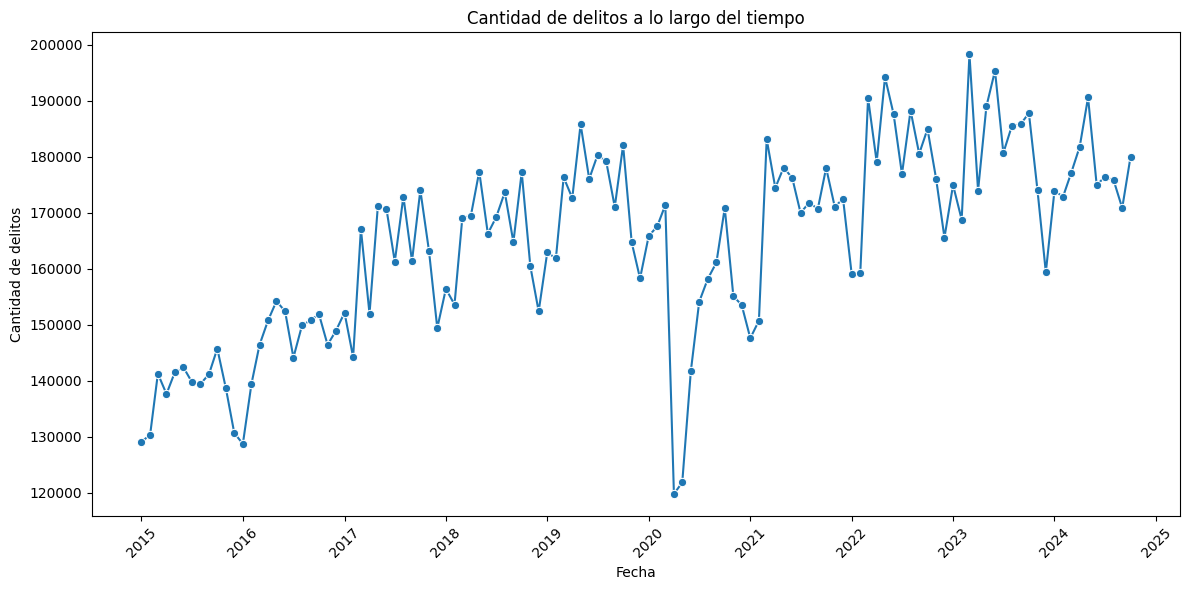

In [40]:

import seaborn as sns


#Agrupamos los datos por Fecha y Cantidad de delitos
delitos_por_fecha = data_delic_long.groupby(["Fecha"])["Cantidad"].sum().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(data=delitos_por_fecha, x="Fecha", y="Cantidad", marker="o")
plt.title("Cantidad de delitos a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de delitos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observando el gráfico anterior podemos visualizar 3 puntos a simple vista:

- 1- Una tendencia ascendente a lo largo del tiempo, es decir, los delitos van en aumento conforme pasa el tiempo.
- 2- Una caida abrupta en los delitos a inicios de 2020, dicha caida es causada por la pandemia COVID-19
- 3- Una estacionalidad en los años con un patron ciclico.

### Top 10 tipos de delitos en los ultimos años

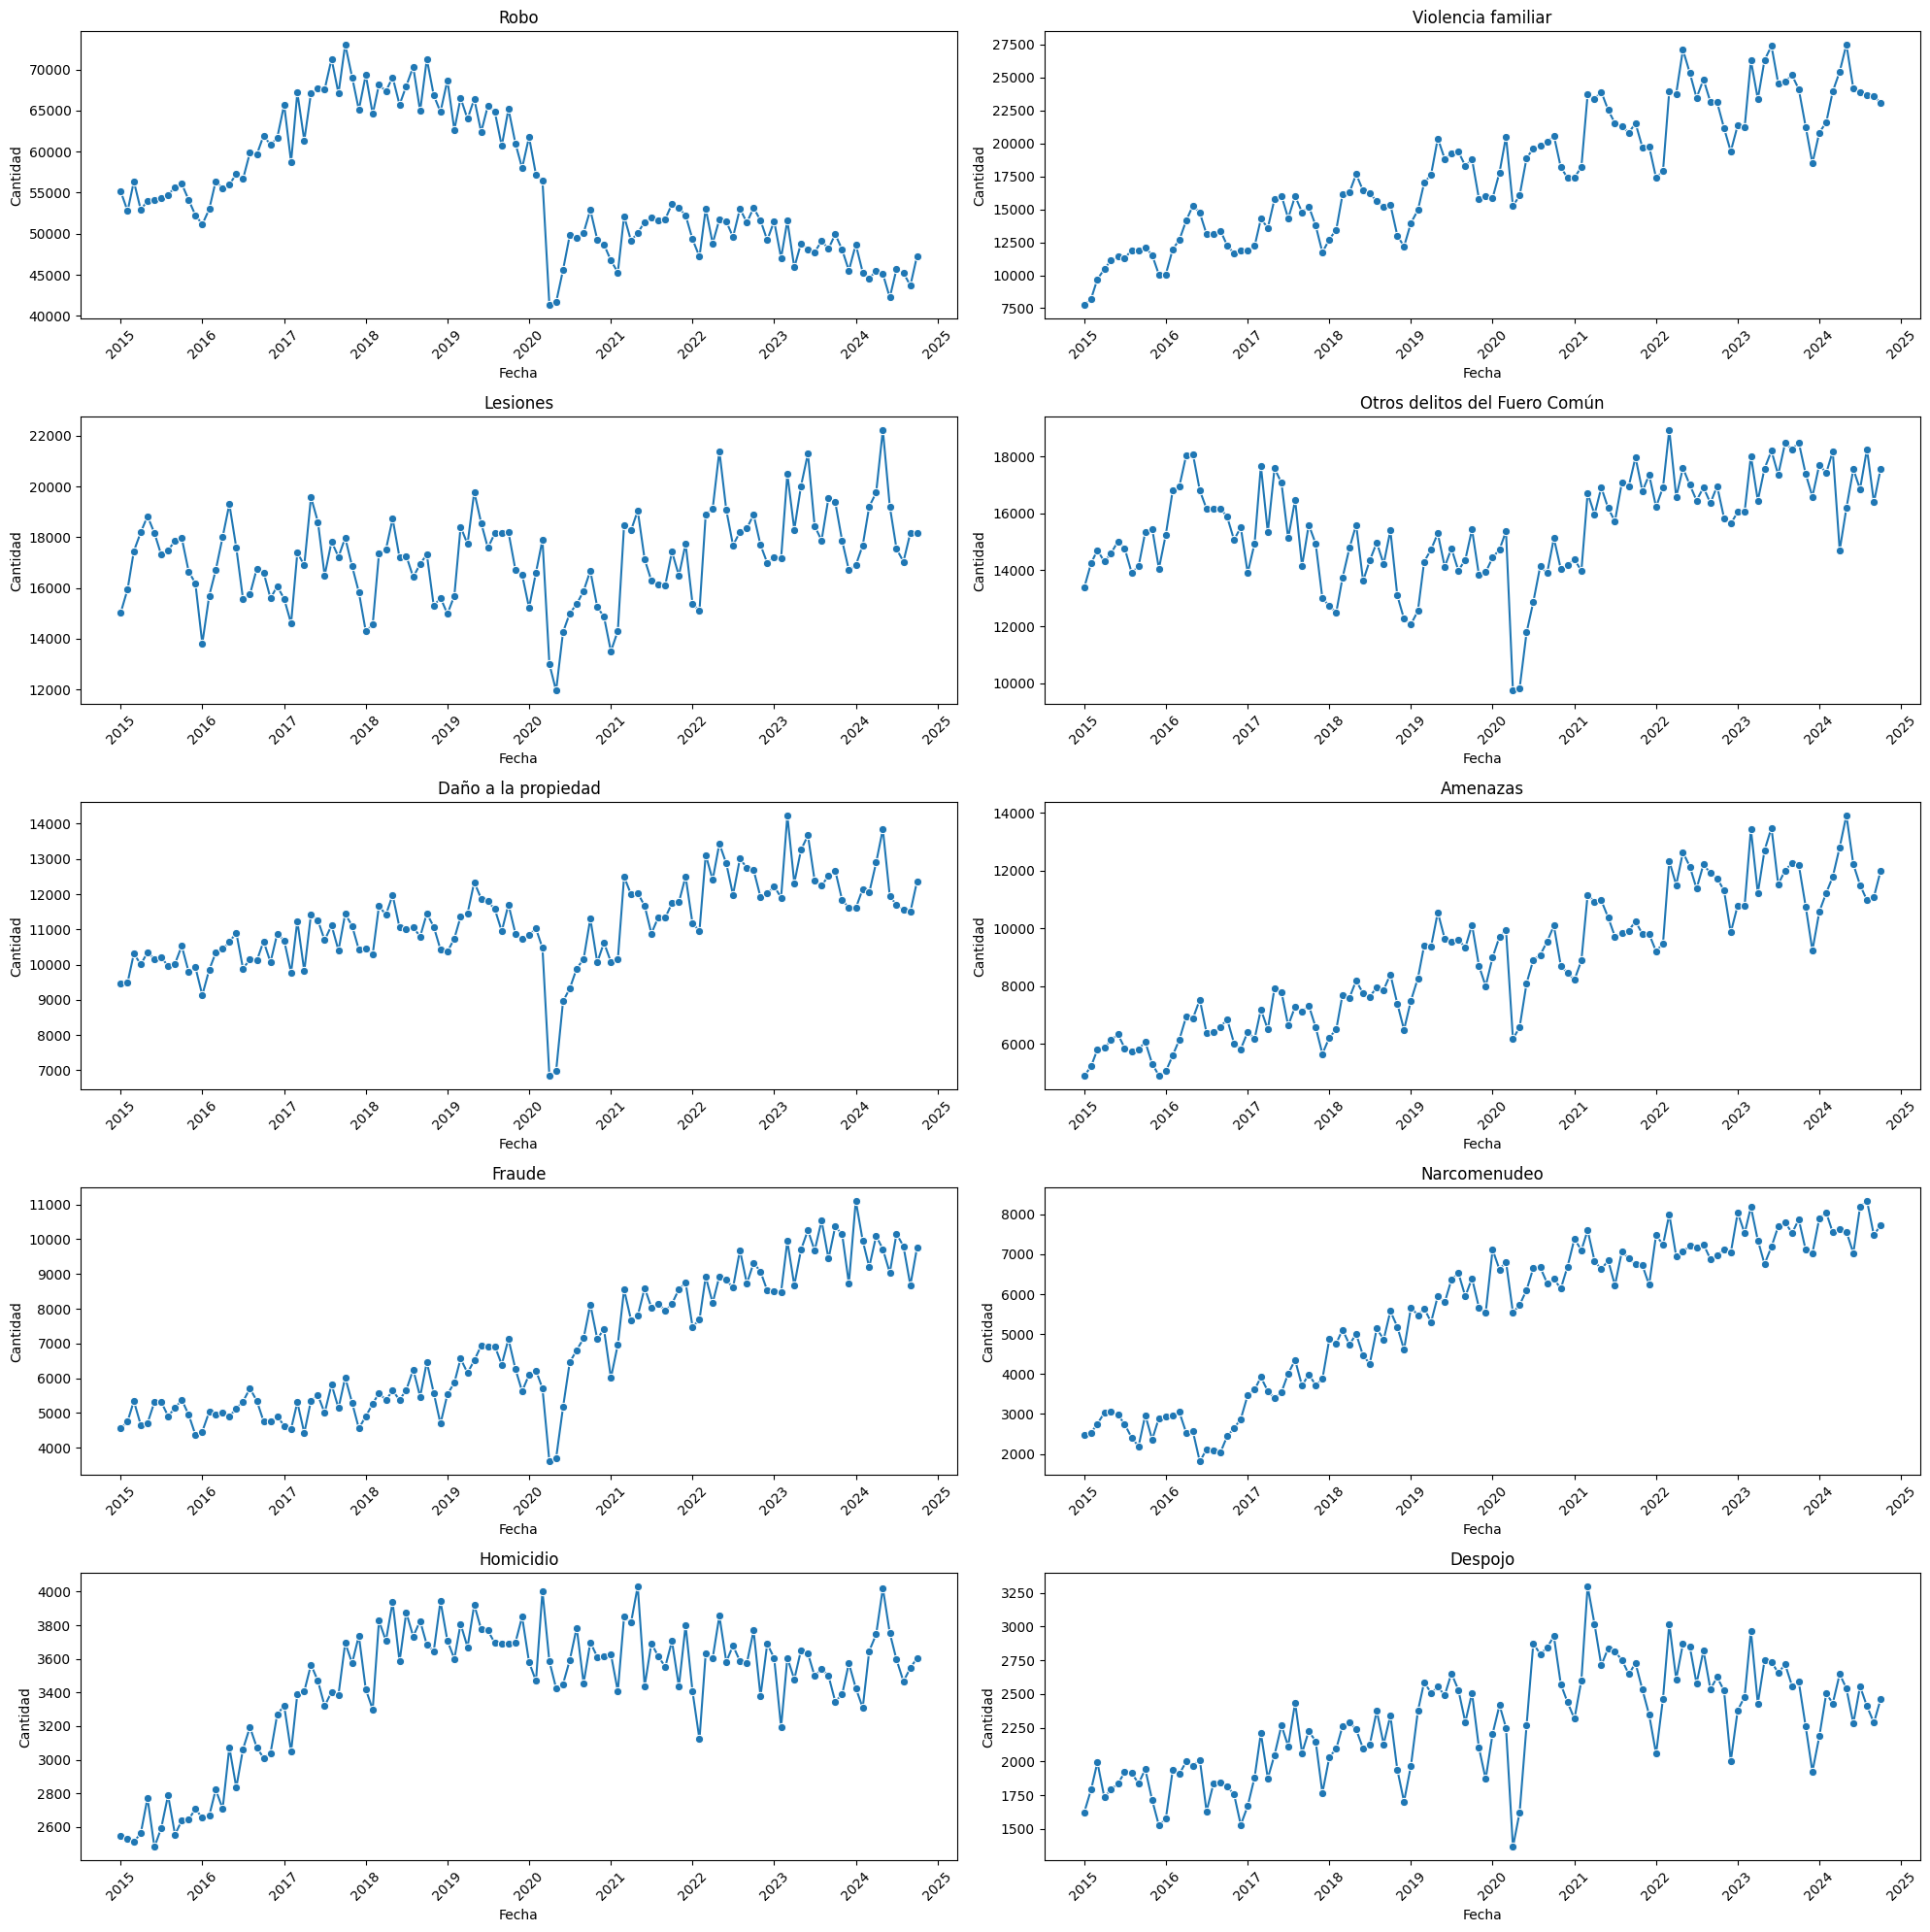

In [ ]:
data_agrupada = (
    data_delic_long.groupby(["Fecha", "Tipo de delito"])["Cantidad"]
    .sum()
    .reset_index()
)


top_tipos_delito = (
    data_delic_long.groupby("Tipo de delito")["Cantidad"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)


data_top10 = data_agrupada[data_agrupada["Tipo de delito"].isin(top_tipos_delito)]


fig, axes = plt.subplots(5, 2, figsize=(20, 20))  # Grid de 5 filas x 2 columnas
axes = axes.flatten()  # Aplanar para iterar más fácilmente

for i, delito in enumerate(top_tipos_delito):
    ax = axes[i]
    # Filtrar los datos del delito actual
    data_delito = data_top10[data_top10["Tipo de delito"] == delito]
    # Graficar
    sns.lineplot(data=data_delito, x="Fecha", y="Cantidad", ax=ax, marker="o")
    ax.set_title(delito)
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Cantidad")
    ax.tick_params(axis="x", rotation=45)  # Rotar etiquetas del eje X

# Ajustar diseño para evitar solapamiento
plt.tight_layout()
plt.show()

La tendencia al alza se puede observar en 9 de los 10 delitos más comunes registrados teniendo como la excepción "Robo" el cual es el delito con mayor numero de incidencias, a continuación se muestra un desglose de dicho delito según Subtipo de Delito y Modalidad.

### Robos en los ultimos años

In [ ]:
#Se filtra el set de datos original por tipo de Delito "Robo"
data_robo=data_delic_long[data_delic_long["Tipo de delito"]=="Robo"]

In [ ]:
data_robo.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Mes,Cantidad,Fecha
39,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo a casa habitación,Con violencia,1,4.0,2015-01-01
40,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo a casa habitación,Sin violencia,1,172.0,2015-01-01
41,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,4.0,2015-01-01
42,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,1,114.0,2015-01-01
43,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,1,1.0,2015-01-01


In [ ]:
robos_por_año=data_robo.groupby("Año")["Cantidad"].sum().reset_index
robos_por_año

<bound method Series.reset_index of Año
2015    652647.0
2016    690048.0
2017    801099.0
2018    810592.0
2019    766096.0
2020    604275.0
2021    609271.0
2022    609635.0
2023    581510.0
2024    453239.0
Name: Cantidad, dtype: float32>

In [ ]:
#Robos por subtipo
robos_por_subtipo=data_robo.groupby("Subtipo de delito")["Cantidad"].sum().reset_index()
robos_por_subtipo=robos_por_subtipo.sort_values(by="Cantidad",ascending=False)
robos_por_subtipo

,Subtipo de delito,Cantidad
33,Otros robos,1926104.0
44,Robo de vehículo automotor,1622678.0
37,Robo a negocio,908250.0
39,Robo a transeúnte en vía pública,724174.0
35,Robo a casa habitación,715908.0
41,Robo de autopartes,173699.0
46,Robo en transporte público colectivo,142252.0
45,Robo en transporte individual,133829.0
40,Robo a transportista,95822.0
42,Robo de ganado,48466.0


In [ ]:
#Robos por Modalidad
robos_por_modalidad=data_robo.groupby("Modalidad")["Cantidad"].sum().reset_index()
robos_por_modalidad=robos_por_modalidad.sort_values(by="Cantidad",ascending=False)
robos_por_modalidad

,Modalidad,Cantidad
52,Sin violencia,3227551.0
9,Con violencia,1712684.0
39,Robo de coche de 4 ruedas Sin violencia,843263.0
38,Robo de coche de 4 ruedas Con violencia,456859.0
45,Robo de motocicleta Sin violencia,233440.0
44,Robo de motocicleta Con violencia,88864.0
37,"Robo de cables, tubos y otros objetos destinad...",9049.0
43,Robo de herramienta industrial o agrícola Sin ...,3791.0
42,Robo de herramienta industrial o agrícola Con ...,1094.0
47,Robo de tractores Sin violencia,685.0


### Cantidad de delitos por Estado

Es de interes también el conocer la distribución de delitos por Entidad, en el siguiente gráfico encontramos que en los ultimos años la cantidad de delitos el Estado de méxico y Ciudad de México conforman la mayor frecuencia en base a los delitos totales.

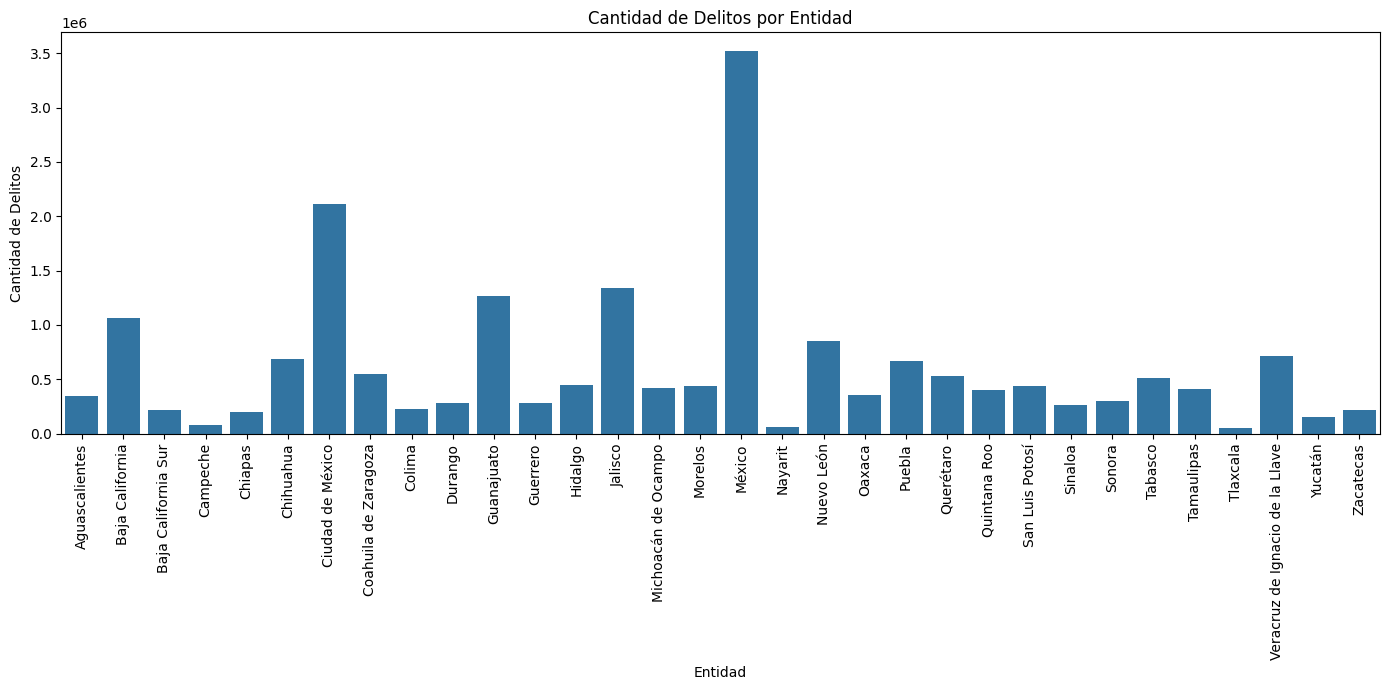

In [ ]:
# Gráfico de la cantidad de delitos por entidad

delitos_por_entidad = data_delic_long.groupby(["Entidad"])["Cantidad"].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x="Entidad", y="Cantidad", data=delitos_por_entidad, estimator="sum", ci=None)
plt.title("Cantidad de Delitos por Entidad")
plt.xlabel("Entidad")
plt.ylabel("Cantidad de Delitos")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
delitos_por_entidad

,Entidad,Cantidad
0,Aguascalientes,345134.0
1,Baja California,1061823.0
2,Baja California Sur,217612.0
3,Campeche,81147.0
4,Chiapas,197919.0
5,Chihuahua,683165.0
6,Ciudad de México,2114668.0
7,Coahuila de Zaragoza,545071.0
8,Colima,226953.0
9,Durango,279362.0


Para realizar un analisis visual de cual ha sido el Estado con mayor cantidad de delitos registrado por año visualizaremos el top 10 de cada año incluido en los datos.

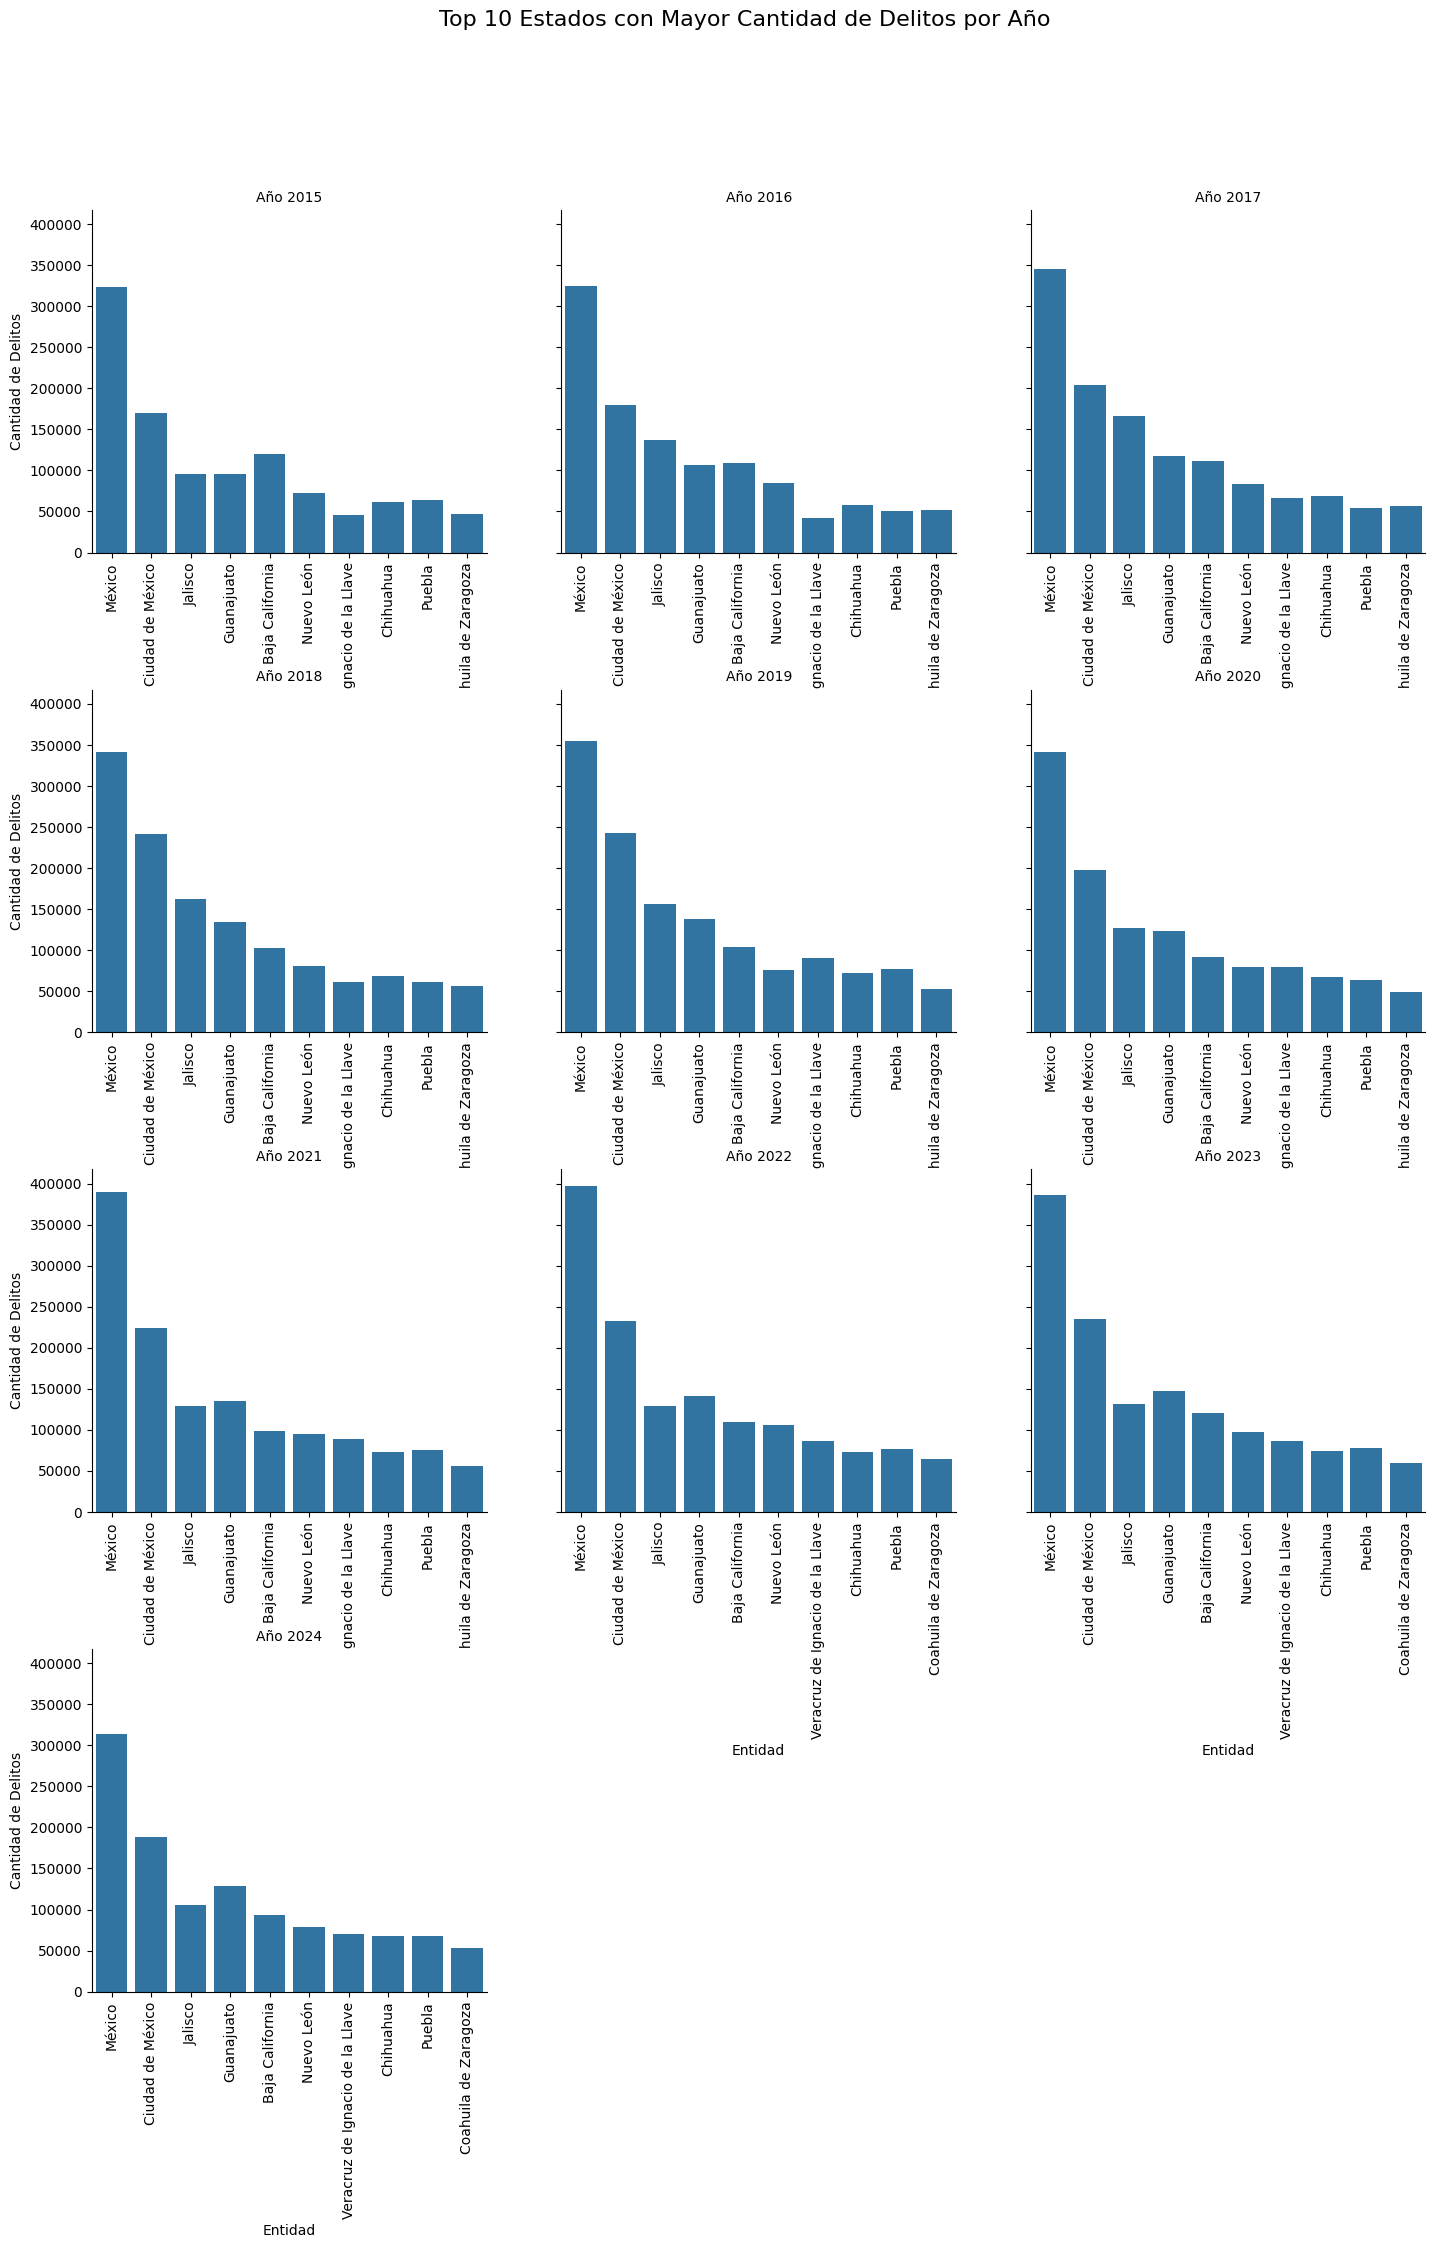

In [ ]:

# Agrupacion
delitos_por_entidad_anual = data_delic_long.groupby(["Año", "Entidad"])["Cantidad"].sum().reset_index()

top_entidades = (
    delitos_por_entidad_anual.groupby("Entidad")["Cantidad"].sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)


delitos_top_10 = delitos_por_entidad_anual[delitos_por_entidad_anual["Entidad"].isin(top_entidades)]


g = sns.FacetGrid(data=delitos_top_10, col="Año", col_wrap=3, height=5, sharex=False, sharey=True)
g.map(sns.barplot, "Entidad", "Cantidad", order=top_entidades, ci=None)

g.set_titles("Año {col_name}")
g.set_axis_labels("Entidad", "Cantidad de Delitos")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


plt.subplots_adjust(top=0.92, hspace=0.4)  # `top` ajusta el título global, `hspace` la altura entre gráficos
g.fig.suptitle("Top 10 Estados con Mayor Cantidad de Delitos por Año", fontsize=16, y=1.02)
plt.show()

## Integración con datos adicionales

La información disponible en el archivo de Datos Abiertos de Incidencia Delictiva proporciona un desglose detallado de los delitos registrados, clasificados por tipo, subtipo, modalidad y otras categorías. Sin embargo, su alcance es principalmente descriptivo, ya que refleja únicamente los delitos reportados en cada entidad y municipio.

El objetivo principal de este proyecto de investigación es demostrar cómo el uso de inteligencia artificial puede contribuir significativamente a la toma de decisiones estratégicas en materia de seguridad. Para ello, se busca desarrollar un modelo predictivo que estime la cantidad de delitos por municipio, utilizando múltiples variables como insumos.

En este contexto, es fundamental enriquecer los datos actuales integrándolos con otras fuentes que puedan estar correlacionadas con los índices delictivos. En las siguientes secciones se describirá el proceso de integración de diversas bases de datos y se llevará a cabo un análisis de correlación de las variables involucradas. Este análisis permitirá identificar los estimadores más relevantes y, con base en los datos, sustentar la elección del modelo más adecuado.

### Información Geográfica

Los archivos usados en la integración geográfica se encuentran disponibles en [Biblioteca Digital de Mapas - INEGI](https://www.inegi.org.mx/app/mapas/)

Un archivo shapefile es un formato de almacenamiento de información geoespacial ampliamente utilizado en los sistemas de información geográfica (SIG). Este formato, desarrollado por Esri, consta de al menos tres archivos principales:

-  .shp: Almacena la geometría de los elementos geoespaciales, como puntos, líneas o polígonos.
- .shx: Contiene un índice que facilita el acceso rápido a la geometría.
- .dbf: Guarda atributos tabulares asociados a cada elemento geoespacial.

El uso de archivos shapefile permite incorporar información geolocalizada en el análisis. Esto es fundamental para identificar patrones espaciales y realizar estudios de correlación geográfica, como:

- Identificar correlación espacial: Mediante el cálculo del índice de Moran, es posible determinar si existe una relación entre los índices delictivos de municipios o estados vecinos, evaluando patrones de agrupamiento (clústeres) o dispersión.

- Modelos de interacción espacial: La elección de un modelo tipo reina, que considera las interacciones entre áreas vecinas basadas en contigüidad (elementos que comparten un borde o vértice), facilita el análisis de cómo los delitos en un municipio pueden influir en áreas adyacentes.

- Visualizaciones geográficas: Los shapefiles permiten generar mapas dinámicos y estáticos que muestran datos agregados, como índices delictivos, proporcionando una representación clara e intuitiva de los resultados del análisis.

- Integración en modelos predictivos: Incorporar variables geoespaciales (como coordenadas, densidad de población o distancias a puntos de interés) puede mejorar el desempeño de modelos estadísticos, de machine learning o redes neuronales al incluir la dimensión espacial como un factor explicativo.

En este proyecto, los archivos shapefile facilitarán la integración de la información geográfica en las visualizaciones y en los análisis exploratorios, apoyando tanto la elección del modelo predictivo más adecuado como la interpretación de los resultados. Esto permitirá evaluar cómo la inteligencia artificial puede tomar en cuenta la geografía para optimizar la toma de decisiones en el ámbito de seguridad pública.

In [ ]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


<Axes: >

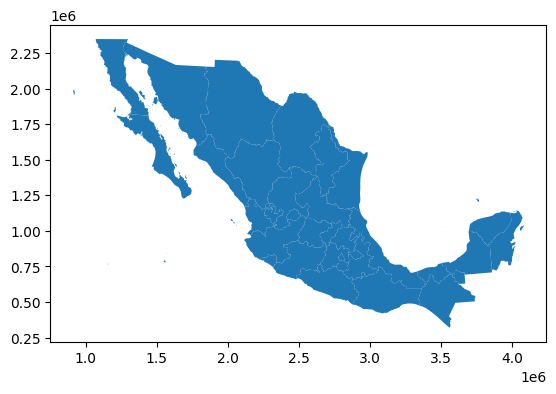

In [ ]:
import geopandas as gpd
shapefile = "00ent.shp"
mexico_map = gpd.read_file(shapefile)
mexico_map.plot()


En un archivo shapefile, la columna geometry es una representación geoespacial que describe la forma y posición de los elementos geográficos, como puntos, líneas o polígonos, en un sistema de coordenadas específico. Esta columna es esencial, ya que define la estructura geográfica del dato y permite que los sistemas de información geográfica (SIG) realicen operaciones espaciales como visualizaciones, cálculos de distancias, identificaciones de vecinos, entre otras.

In [ ]:
mexico_map.head()

,CVEGEO,CVE_ENT,NOMGEO,geometry
0,01,01,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248..."
1,02,02,Baja California,"MULTIPOLYGON (((1313480.513 1831458.607, 13135..."
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946..."
3,04,04,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491..."
4,05,05,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807..."


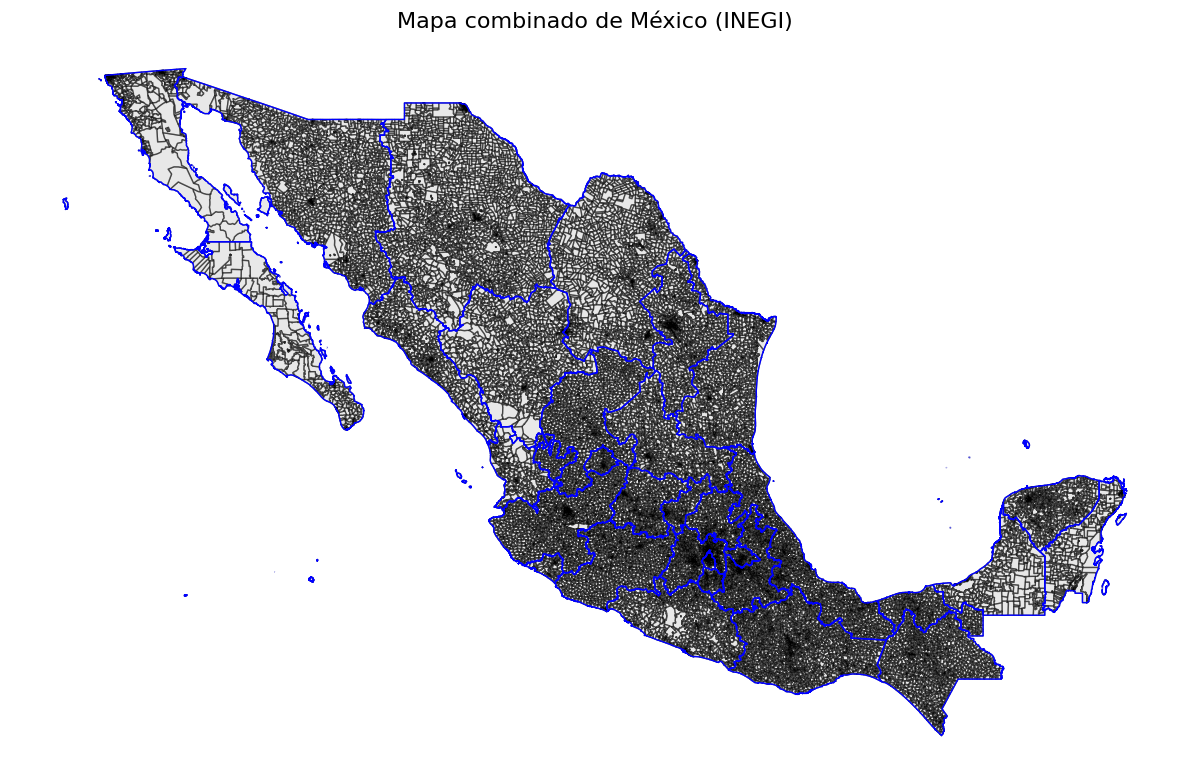

In [ ]:
# Se realiza la carga de los archivos Shapefile a utilizar
entidades = gpd.read_file("00ent.shp")  # Límites de entidades
municipios = gpd.read_file("00mun.shp")  # Límites de municipios
area_general = gpd.read_file("00a.shp")  # Área general

# Se homologan las capas
entidades = entidades.to_crs("EPSG:4326")
municipios = municipios.to_crs(entidades.crs)
area_general = area_general.to_crs(entidades.crs)

fig, ax = plt.subplots(figsize=(12, 10))
area_general.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)
entidades.plot(ax=ax, color="none", edgecolor="blue", linewidth=1)
ax.set_title("Mapa combinado de México (INEGI)", fontsize=16)
ax.axis("off")


plt.tight_layout()
plt.show()


In [ ]:
entidades.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CVEGEO    32 non-null     object  
 1   CVE_ENT   32 non-null     object  
 2   NOMGEO    32 non-null     object  
 3   geometry  32 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 1.1+ KB


In [ ]:
municipios.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CVEGEO    2475 non-null   object  
 1   CVE_ENT   2475 non-null   object  
 2   CVE_MUN   2475 non-null   object  
 3   NOMGEO    2475 non-null   object  
 4   geometry  2475 non-null   geometry
dtypes: geometry(1), object(4)
memory usage: 96.8+ KB


<Axes: >

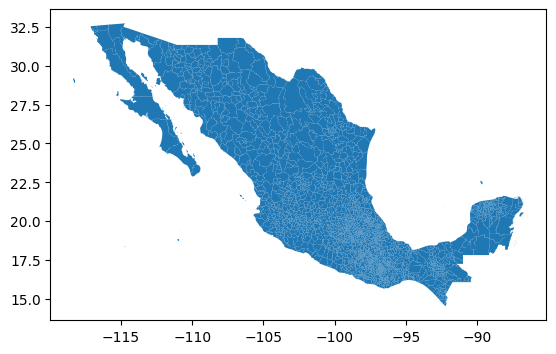

In [ ]:
municipios.plot()

<Axes: >

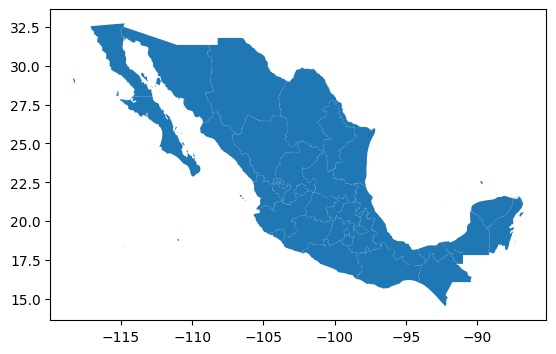

In [ ]:
entidades.plot()

In [ ]:
area_general.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 81815 entries, 0 to 81814
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CVEGEO    81815 non-null  object  
 1   CVE_ENT   81815 non-null  object  
 2   CVE_MUN   81815 non-null  object  
 3   CVE_LOC   64345 non-null  object  
 4   CVE_AGEB  81815 non-null  object  
 5   AMBITO    81815 non-null  object  
 6   geometry  81815 non-null  geometry
dtypes: geometry(1), object(6)
memory usage: 4.4+ MB


In [ ]:
data_delic_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27342196 entries, 0 to 27585529
Data columns (total 12 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Año                     int16         
 1   Clave_Ent               int8          
 2   Entidad                 category      
 3   Cve. Municipio          int16         
 4   Municipio               category      
 5   Bien jurídico afectado  category      
 6   Tipo de delito          category      
 7   Subtipo de delito       category      
 8   Modalidad               category      
 9   Mes                     int8          
 10  Cantidad                float32       
 11  Fecha                   datetime64[ns]
dtypes: category(6), datetime64[ns](1), float32(1), int16(2), int8(2)
memory usage: 860.6 MB


#### Combinacion de datos geográficos

Dado que el objetivo del proyecto, es el realizar un modelo predictivo de delitos se iniciara el ánalisis de los parametros influyentes que serán tomados en cuenta con la siguiente pregunta:
¿La cantidad de delitos en los municipios cercanos, tiene correlación estadísticamente significativa? Es decir, ¿si un municipio  tiene un indice delictivo alto, los municipios cercanos tienen mayor probabilidad de tener un indice delictivo elevado?

In [ ]:
delitos_por_municipio = data_delic_long.groupby(['Municipio'])['Cantidad'].sum().reset_index()

In [ ]:
delitos_por_municipio.describe()


,Cantidad
count,2334.000000
mean,8310.966797
std,34473.214844
min,0.000000
25%,113.250000
50%,532.500000
75%,2674.500000
max,473209.000000


**Unión de Datos Geoespaciales con Delitos**

Una vez que los datos de delitos fueron agregados por municipio, se procedió a unir esta información con los shapefiles de municipios, utilizando como clave la columna Municipio en los datos de delitos y NOMGEO en el shapefile de municipios. Esta operación asegura que cada municipio tenga asociada su geometría para poder realizar análisis geoespaciales.

In [ ]:

delitos_por_municipio['Municipio'] = delitos_por_municipio['Municipio'].astype(str)
municipios['NOMGEO'] = municipios['NOMGEO'].astype(str)


merge_municipios = delitos_por_municipio.merge(municipios[['NOMGEO', 'geometry']], left_on='Municipio', right_on='NOMGEO', how='left')
merge_municipios.head()

,Municipio,Cantidad,NOMGEO,geometry
0,Abalá,128.0,Abalá,"POLYGON ((-89.68444 20.74119, -89.67649 20.734..."
1,Abasolo,12828.0,Abasolo,"POLYGON ((-101.25528 27.22528, -101.23321 27.2..."
2,Abasolo,12828.0,Abasolo,"POLYGON ((-101.59013 20.75604, -101.58929 20.7..."
3,Abasolo,12828.0,Abasolo,"POLYGON ((-100.39267 25.98715, -100.39224 25.9..."
4,Abasolo,12828.0,Abasolo,"POLYGON ((-98.18447 24.42285, -98.14746 24.423..."


**Cálculo de la Autocorrelación Espacial**

La autocorrelación espacial se utiliza para determinar si los valores de una variable en lugares geográficos cercanos están correlacionados entre sí. En este caso, se calcula la autocorrelación espacial de la variable Cantidad (delitos) en función de las geometrías de los municipios.

Para calcular la autocorrelación espacial, se utilizó el índice de Moran, que es una medida de la correlación espacial global. Un valor alto del índice de Moran indica que los municipios cercanos tienen una mayor probabilidad de compartir tasas de delitos similares, mientras que un valor bajo sugiere que no existe una relación espacial significativa.

In [ ]:
# Eliminar filas con geometrías nulas
merge_municipios = merge_municipios[merge_municipios.geometry.notnull()]



In [ ]:
import libpysal as ps  # Cambié la importación

# Calcular la matriz de pesos espaciales basada en la contigüidad (o distancia)
w = ps.weights.Queen.from_dataframe(merge_municipios)  # Accede a weights correctamente
w.transform = 'r'  # Normalizar los pesos

# Calcular el índice de Moran
from esda import Moran  # Importa correctamente el análisis espacial de PySAL
moran = Moran(merge_municipios['Cantidad'], w)
print(moran.I)  # Índice de Moran



('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 101, ' is an island (no neighbors)')
('WARNING: ', 140, ' is an island (no neighbors)')
('WARNING: ', 469, ' is an island (no neighbors)')
('WARNING: ', 575, ' is an island (no neighbors)')
('WARNING: ', 593, ' is an island (no neighbors)')
('WARNING: ', 652, ' is an island (no neighbors)')
('WARNING: ', 919, ' is an island (no neighbors)')
('WARNING: ', 1096, ' is an island (no neighbors)')
('WARNING: ', 1157, ' is an island (no neighbors)')
('WARNING: ', 1217, ' is an island (no neighbors)')
('WARNING: ', 1349, ' is an island (no neighbors)')
('WARNING: ', 1371, ' is an island (no neighbors)')
('WARNING: ', 1773, ' is an island (no neighbors)')
('WARNING: ', 1827, ' is an island (no neighbors)')
('WARNING: ', 1921, ' is an island (no neighbors)')
('WARNING: ', 2008, ' is an island (no neighbors)')
('WARNING: ', 2160, ' is an island (no neighbors)')
('WARNING: ', 2342, ' is an island (no neighbors)')
('WARNING: ', 2415, '

A este punto de la combinación como se observa el DataFrame tiene un peso de poco más de 3.9GB por lo que se realizará una transformación de datos adicional para optimizar el manejo de datos.

In [ ]:
# Cambiar tipo de datos de columnas numéricas
data_delic_long['Año'] = data_delic_long['Año'].astype('int32')
data_delic_long['Clave_Ent'] = data_delic_long['Clave_Ent'].astype('int32')
data_delic_long['Cve. Municipio'] = data_delic_long['Cve. Municipio'].astype('int32')
data_delic_long['Mes'] = data_delic_long['Mes'].astype('int8')
data_delic_long['Cantidad'] = data_delic_long['Cantidad'].astype('float32')

# Convertir columnas de texto a categorías
data_delic_long['Entidad'] = data_delic_long['Entidad'].astype('category')
data_delic_long['Municipio'] = data_delic_long['Municipio'].astype('category')
data_delic_long['Bien jurídico afectado'] = data_delic_long['Bien jurídico afectado'].astype('category')
data_delic_long['Tipo de delito'] = data_delic_long['Tipo de delito'].astype('category')
data_delic_long['Subtipo de delito'] = data_delic_long['Subtipo de delito'].astype('category')
data_delic_long['Modalidad'] = data_delic_long['Modalidad'].astype('category')


In [ ]:
data_delic_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32804716 entries, 0 to 32804715
Data columns (total 16 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Año                     int32         
 1   Clave_Ent               int32         
 2   Entidad                 category      
 3   Cve. Municipio          int32         
 4   Municipio               category      
 5   Bien jurídico afectado  category      
 6   Tipo de delito          category      
 7   Subtipo de delito       category      
 8   Modalidad               category      
 9   Mes                     int8          
 10  Cantidad                float32       
 11  Fecha                   datetime64[ns]
 12  NOMGEO_x                object        
 13  geometry_estado         geometry      
 14  NOMGEO_y                object        
 15  geometry_municipio      geometry      
dtypes: category(6), datetime64[ns](1), float32(1), geometry(2), int32(3), int8(1), object(2)

In [ ]:
data_delic_long.rename(columns={'geometry_x': 'geometry_estado', 'geometry_y': 'geometry_municipio'}, inplace=True)


In [ ]:
# Agrupar por Municipio y calcular el índice delictivo total
indice_delictivo = data_delic_long.groupby('Municipio')['Cantidad'].sum().reset_index()

# Crear un GeoDataFrame con las geometrías de los municipios
gdf = gpd.GeoDataFrame(data_delic_long, geometry='geometry_municipio')


In [ ]:


# Filtrar datos para el año 2024
gdf_2024 = gdf[gdf['Año'] == 2024]

# Filtrar filas con geometrías válidas y no nulas
gdf_valid = gdf_2024[gdf_2024['geometry_municipio'].notnull()]

# Simplificar geometrías
gdf_valid['geometry_municipio'] = gdf_valid['geometry_municipio'].simplify(tolerance=0.01)

# Calcular centroides
gdf_valid['centroid'] = gdf_valid['geometry_municipio'].centroid

# Crear un diccionario para acceso rápido a la cantidad
cantidad_dict = indice_delictivo.set_index('Municipio')['Cantidad'].to_dict()

# Crear los datos para el mapa de calor
heat_data = [
    [row.centroid.y, row.centroid.x, cantidad_dict.get(row.Municipio, 0)]
    for _, row in gdf_valid.iterrows()
    if row.geometry_municipio.is_valid and not row.geometry_municipio.is_empty
]

# Crear el mapa base
m = folium.Map(location=[23.6345, -102.5528], zoom_start=5)

# Agregar el mapa de calor
HeatMap(heat_data).add_to(m)

# Mostrar el mapa
m


KeyboardInterrupt: 

La estacionalidad en series de tiempo hace referencia a los patrones cíclicos que ocurren en intervalos regulares dentro de los datos, en este caso, en cada año parece observarse un ciclo que se repite en el aumento y disminución de los delitos. Estos patrones son importantes a considerar al momento de decidir que modelo predictivo se usará.
En las gráficas de series de tiempo podemos observar una tendencia alcista así como un patron repetitivo donde a final de año existe una baja en los delitos y un alza repentina en los primeros meses del año.
A continuación se realizarán pruebas estadísticas para comprobar si existe estacionalidad estadísticamente significativa en nuestros datos.

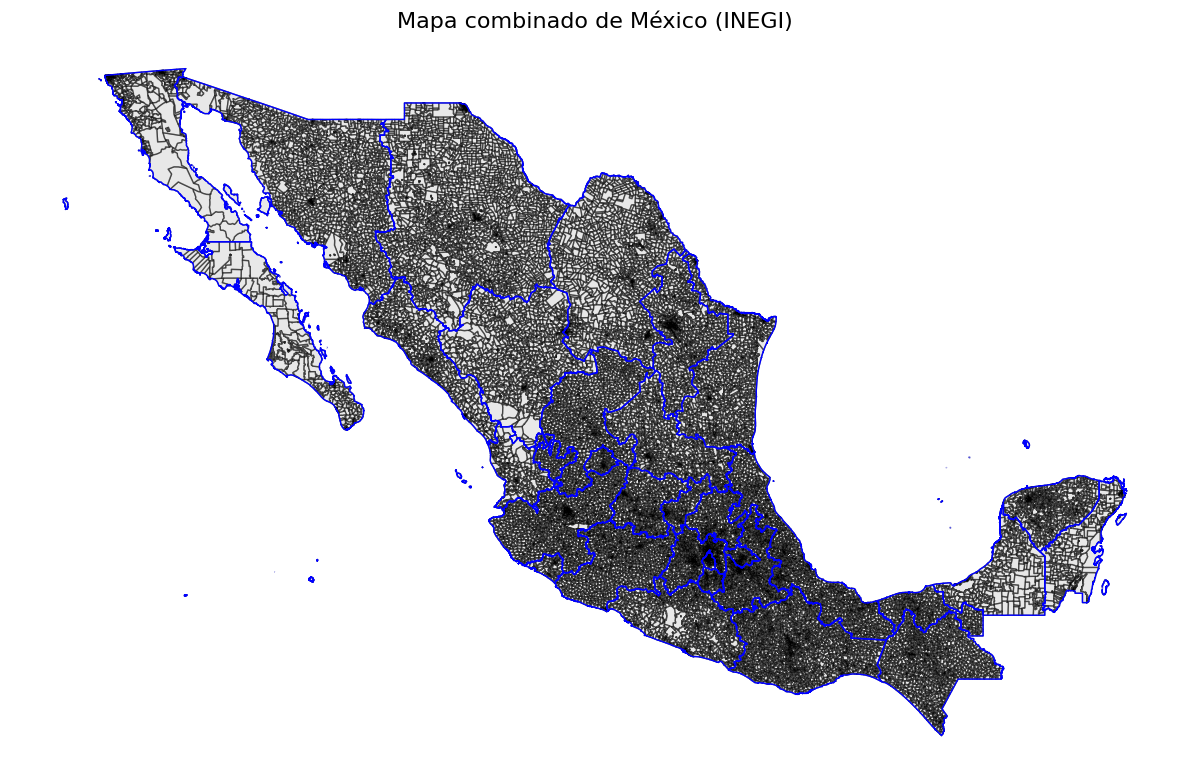

In [ ]:
#Mapa combinado
# Carga los shapefiles
entidades = gpd.read_file("00ent.shp")  # Límites de entidades
municipios = gpd.read_file("00mun.shp")  # Límites de municipios
lineas = gpd.read_file("00l.shp")  # Líneas (carreteras, ríos, etc.)
area_general = gpd.read_file("00a.shp")  # Área general

# Asegúrate de que todas las capas tengan la misma proyección (CRS)
entidades = entidades.to_crs("EPSG:4326")
municipios = municipios.to_crs(entidades.crs)
lineas = lineas.to_crs(entidades.crs)
area_general = area_general.to_crs(entidades.crs)

# Crear el mapa combinando las capas
fig, ax = plt.subplots(figsize=(12, 10))

# Dibuja el área general
area_general.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)

# Dibuja los límites de las entidades
entidades.plot(ax=ax, color="none", edgecolor="blue", linewidth=1)


# Configura el título y oculta los ejes
ax.set_title("Mapa combinado de México (INEGI)", fontsize=16)
ax.axis("off")

# Muestra el mapa
plt.tight_layout()
plt.show()


In [ ]:
#Creación de modelo de predicción de delitos por estado y fecha

In [ ]:
data_delic_long.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Mes,Cantidad,Fecha
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,1,2.0,2015-01-01
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1.0,2015-01-01
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,1,0.0,2015-01-01
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,1.0,2015-01-01
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,1,0.0,2015-01-01


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Instanciamos el encoder
label_encoder = LabelEncoder()

# Codificamos las columnas categóricas
data_delic_long['Entidad'] = label_encoder.fit_transform(data_delic_long['Entidad'])
data_delic_long['Tipo de delito'] = label_encoder.fit_transform(data_delic_long['Tipo de delito'])

# Ver las primeras filas para asegurar la codificación
print(data_delic_long[['Entidad', 'Tipo de delito']].head())

   Entidad  Tipo de delito
0        0              18
1        0              18
2        0              18
3        0              18
4        0              18


In [ ]:
# Definir las características y el objetivo
X = data_delic_long.drop(columns=['Cantidad', 'Fecha', 'Municipio', 'Bien jurídico afectado', 'Subtipo de delito', 'Modalidad'])  # Las columnas no relevantes
y = data_delic_long['Cantidad']


In [ ]:
#División de conjunto de datos

from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)  # Ver las dimensiones de los conjuntos de entrenamiento y prueba


(22263091, 6) (5565773, 6)


In [ ]:
#Entrenamiento
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Convertir a formato DMatrix que XGBoost entiende bien
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Configuración de parámetros del modelo
params = {
    'objective': 'reg:squarederror',  # Regresión
    'max_depth': 6,
    'learning_rate': 0.1,
    'eval_metric': 'rmse',  # Usamos RMSE para evaluar
    'subsample': 0.8,  # Proporción de datos a usar en cada árbol
    'colsample_bytree': 0.8,  # Proporción de columnas
    'n_estimators': 100,  # Número de árboles
}

# Entrenar el modelo
model = xgb.train(params, dtrain, num_boost_round=100)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(dtest)

# Evaluación del modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')


C:\Users\diego2.gonzalez\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:18:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 7.586770534515381


C:\Users\diego2.gonzalez\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


C:\Users\diego2.gonzalez\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


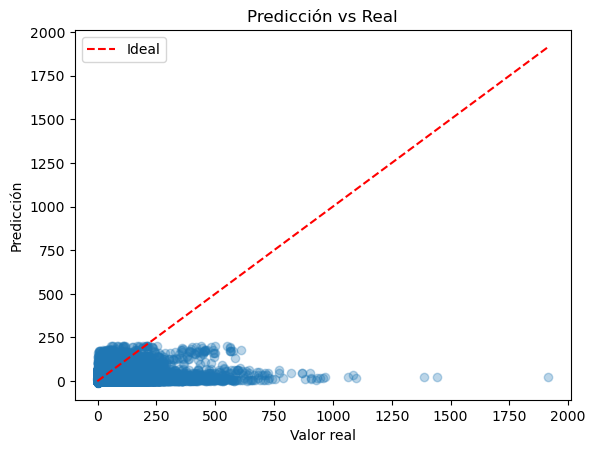

In [ ]:
#Gráfica de predicción vs real
import matplotlib.pyplot as plt

# Gráfico de predicción vs valor real
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Ideal')
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Predicción vs Real')
plt.legend()
plt.show()


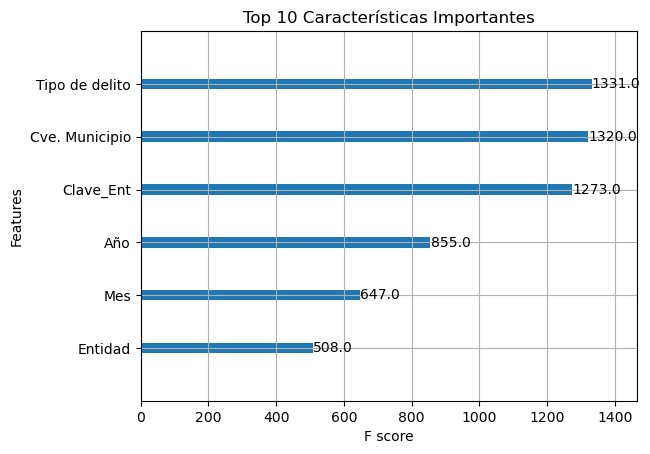

[0]	train-rmse:7.80108055501440045	test-rmse:7.58676898050582516


In [ ]:
#Gráfica de métricas

xgb.plot_importance(model, importance_type='weight', max_num_features=10, title='Top 10 Características Importantes')
plt.show()

# Visualizar las métricas durante el entrenamiento
evals_result = model.eval_set([(dtrain, 'train'), (dtest, 'test')])
print(evals_result)


In [ ]:
#Redes neuronales recurrentes
from sklearn.preprocessing import MinMaxScaler

# Normalizar la variable 'Cantidad'
scaler = MinMaxScaler(feature_range=(0, 1))
data_delic_long['Cantidad_scaled'] = scaler.fit_transform(data_delic_long[['Cantidad']])


In [ ]:
import numpy as np

def create_sequences(df, sequence_length):
    sequences = []
    labels = []
    for i in range(len(df) - sequence_length):
        sequences.append(df.iloc[i:i+sequence_length, :-1].values)  # Datos de entrada
        labels.append(df.iloc[i+sequence_length, -1])  # Variable objetivo
    return np.array(sequences), np.array(labels)

# Usamos 6 meses anteriores para predecir el mes siguiente
sequence_length = 6
X, y = create_sequences(data_delic_long, sequence_length)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Definir el modelo LSTM
model = Sequential()

# Capa LSTM
model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], X.shape[2]), return_sequences=False))

# Dropout para prevenir sobreajuste
model.add(Dropout(0.2))

# Capa densa de salida
model.add(Dense(1))  # Una sola salida (predicción de la cantidad)

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Dividir los datos en entrenamiento y prueba
train_size = int(len(X) * 0.8)  # 80% para entrenamiento
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))


In [ ]:
import matplotlib.pyplot as plt

# Evaluar el modelo en los datos de prueba
y_pred = model.predict(X_test)

# Gráfico de predicciones vs reales
plt.plot(y_test, label='Real')
plt.plot(y_pred, label='Predicción')
plt.legend()
plt.title('Predicción vs Real')
plt.show()

# Calcular el RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


In [ ]:
# Gráfica de la pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.legend()
plt.title('Curva de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()


In [ ]:
##Creación de red neuronal con Transformer para predicción de delitos por estado

In [ ]:
#Librerias
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pytorch_forecasting
from pytorch_forecasting import TemporalFusionTransformer
from pytorch_forecasting.data import TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer


In [ ]:
# Asegúrate de que la columna 'Fecha' sea de tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Convertir la fecha a un índice entero (por ejemplo, el número de meses desde el inicio del dataset)
df['time_idx'] = (df['Fecha'] - df['Fecha'].min()).dt.days // 30  # Índice de tiempo en meses

# Ahora 'time_idx' es un entero y puede ser utilizado como índice temporal


In [ ]:

# Conversión de las variables categóricas
df['Entidad'] = df['Entidad'].astype('category')
df['Tipo de delito'] = df['Tipo de delito'].astype('category')

# Crear una columna para el mes/año para convertirlo en una característica temporal
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Mes'] = df['Fecha'].dt.month
df['Año'] = df['Fecha'].dt.year

# Agregar las columnas que usaremos para el modelo
df['Cantidad'] = df['Cantidad'].fillna(0)  # Rellenar los valores nulos de la cantidad de delitos

# Seleccionar las columnas que vamos a usar
df = df[['Entidad', 'Tipo de delito', 'Fecha', 'Cantidad', 'Mes', 'Año']]

# Codificación de las variables categóricas
encoder = OneHotEncoder(sparse_output=True)
encoded = encoder.fit_transform(df[['Entidad', 'Tipo de delito']])

# Convertir la matriz dispersa a DataFrame
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded, columns=encoder.get_feature_names_out(['Entidad', 'Tipo de delito']))
df = pd.concat([df, encoded_df], axis=1)

# Estructurar el dataset para temporal forecasting
max_prediction_length = 12  # Número de meses a predecir
max_encoder_length = 24  # Número de meses para el historial

# Crear el TimeSeriesDataSet
training = TimeSeriesDataSet(
    df,
    time_idx="Fecha",
    target="Cantidad",
    group_ids=["Entidad", "Tipo de delito"],  # Por cada combinación de entidad y tipo de delito
    min_encoder_length=max_encoder_length,
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=["Entidad", "Tipo de delito"],
    time_varying_known_categoricals=["Mes", "Año"],  # Mes y año como características
    time_varying_known_reals=["Fecha"],
    time_varying_unknown_reals=["Cantidad"],  # Variable de predicción
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True
)

# Normalización de las características
scaler = GroupNormalizer(groups=["Entidad", "Tipo de delito"], transformation="soft")
training = training.scale(scaler)

# Dividir en entrenamiento y validación
train_data, val_data = training.split_after(0.8)

# Crear el modelo Temporal Fusion Transformer (TFT)
trainer = pytorch_forecasting.models.temporal_fusion_transformer.TemporalFusionTransformer.from_dataset(
    train_data,
    learning_rate=0.001,
    hidden_size=64,
    attention_head_size=4,
    dropout=0.1,
    hidden_continuous_size=32,
    output_size=1,
    loss=pytorch_forecasting.metrics.MeanAbsoluteError(),
    log_interval=10,
    reduce_on_plateau_patience=4,
    logging_metrics=[pytorch_forecasting.metrics.MeanSquaredError()],
    pl_trainer_kwargs={"accelerator": "gpu" if torch.cuda.is_available() else "cpu", "devices": 1}
)

# Ajuste del learning rate (opcional)
trainer.lr_find()

# Entrenar el modelo
trainer.fit(train_data, val_data, epochs=20, batch_size=64)

# Gráfico de Learning Rate
lr_finder = trainer.lr_find()
lr_finder.plot_lr_find()
plt.show()

# Evaluación del modelo en los datos de validación
best_model = trainer.load_best_model()
raw_predictions, x = best_model.predict(val_data, mode="raw", return_x=True)

# Predicción vs Real (Gráfico)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x["Fecha"], x["Cantidad"], label="Real", color='blue')
ax.plot(x["Fecha"], raw_predictions[:, 0], label="Predicción", color='red')
plt.title("Predicción vs Real (Cantidad de Delitos)")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Delitos")
plt.legend()
plt.show()

AssertionError: Timeseries index should be of type integer

In [ ]:
# Preparar datos para entrenamiento con TemporalFusionTransformer

# Agrupar los datos por entidad y por mes para crear las secuencias temporales
max_encoder_length = 36  # Número de meses que el modelo usará para mirar atrás
max_prediction_length = 6  # El modelo predecirá la cantidad de delitos para los siguientes 6 meses

# Crear el dataset de series temporales
training = TimeSeriesDataSet(
    df,
    time_idx='Mes',  # Índice temporal, en este caso el mes
    target='Cantidad',  # Variable objetivo, cantidad de delitos
    group_ids=['Entidad'],  # Agrupamos por Entidad
    static_categoricals=['Entidad', 'Tipo de delito'],  # Variables estáticas categóricas
    static_reals=['Año'],  # Variables estáticas numéricas
    time_varying_known_categoricals=['Mes'],  # Variables conocidas que cambian con el tiempo
    time_varying_known_reals=['Año'],  # Variables numéricas conocidas que cambian con el tiempo
    time_varying_unknown_reals=['Cantidad'],  # Variable que cambia con el tiempo y es desconocida
    target_normalizer=GroupNormalizer(groups=['Entidad'], transformation='softplus'),  # Normalización
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length
)

# Dividir los datos en entrenamiento y validación
train_data, val_data = train_test_split(training, test_size=0.2, shuffle=False)


In [ ]:
# Definir el modelo
trainer = pytorch_forecasting.models.temporal_fusion_transformer.TemporalFusionTransformer.from_dataset(
    train_data,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=4,
    dropout=0.1,
    hidden_continuous_size=8,
    output_size=1,  # Solo tenemos una salida, la cantidad de delitos
    loss=pytorch_forecasting.models.temporal_fusion_transformer.loss.MAE()
)

# Entrenar el modelo
trainer.fit(train_data, val_data, epochs=20, batch_size=64)

# Realizar predicciones
raw_predictions, x = trainer.predict(val_data, mode="raw", return_x=True)


In [ ]:
from sklearn.metrics import mean_absolute_error

# Extraer las predicciones reales y las predicciones
true_values = val_data['Cantidad'].values
predictions = raw_predictions['prediction'].values

# Evaluar el rendimiento
mae = mean_absolute_error(true_values, predictions)
print(f'Mean Absolute Error (MAE): {mae}')


In [ ]:
df = data_delic_long

# Conversión de las variables categóricas
df['Entidad'] = df['Entidad'].astype('category')
df['Tipo de delito'] = df['Tipo de delito'].astype('category')

# Crear una columna para el mes/año para convertirlo en una característica temporal
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Mes'] = df['Fecha'].dt.month
df['Año'] = df['Fecha'].dt.year

# Agregar las columnas que usaremos para el modelo
df['Cantidad'] = df['Cantidad'].fillna(0)  # Rellenar los valores nulos de la cantidad de delitos

# Crear un encoding de la variable 'Entidad' y 'Tipo de delito'
encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(df[['Entidad', 'Tipo de delito']])

# Añadir las columnas codificadas a nuestro dataframe original
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Entidad', 'Tipo de delito']))
df = pd.concat([df, encoded_df], axis=1)


In [ ]:
# Extraer las predicciones y los valores reales
true_values = val_data['Cantidad'].values
predictions = raw_predictions['prediction'].values

# Crear la gráfica
plt.figure(figsize=(12, 6))

# Graficar los valores reales
plt.plot(true_values, label='Valores Reales', color='blue', alpha=0.6)

# Graficar las predicciones
plt.plot(predictions, label='Predicciones', color='red', linestyle='--', alpha=0.6)

# Personalizar el gráfico
plt.title('Predicción vs Valor Real (Cantidad de Delitos)')
plt.xlabel('Índice')
plt.ylabel('Cantidad de Delitos')
plt.legend()

# Mostrar la gráfica
plt.show()

### Análisis de Autocorrelación Espacial en los Índices Delictivos de México


La autocorrelación espacial es una técnica estadística utilizada para analizar si un fenómeno tiene una distribución no aleatoria en el espacio geográfico. Este concepto evalúa si los valores de una variable en ubicaciones cercanas tienden a ser similares (autocorrelación positiva) o diferentes (autocorrelación negativa). En el contexto de la delincuencia, la autocorrelación espacial permite explorar si la concentración de delitos en un municipio tiene relación con los delitos en municipios vecinos.

**Importancia de la Autocorrelación Espacial**

Entender la distribución espacial de los delitos es esencial para:

- Diseñar políticas públicas efectivas: Identificar "zonas calientes" puede ayudar a asignar recursos de seguridad de forma más eficiente (Chainey y Ratcliffe, 2005).
- Explorar patrones emergentes: Permite investigar si ciertas dinámicas sociales, económicas o culturales influyen en la propagación de la actividad delictiva.
- Identificar relaciones geográficas: Evaluar si las cercanías físicas entre municipios explican parte de la variabilidad de los delitos (Bivand, Pebesma y Gómez-Rubio, 2013).

**Índice de Moran: El Indicador de Autocorrelación Espacial**

El Índice de Moran (Moran's I) es una de las métricas más utilizadas para evaluar la autocorrelación espacial. Su fórmula combina la relación de los valores de una variable (en este caso, delitos) con una matriz de pesos espaciales que define las relaciones de vecindad entre áreas geográficas. Sus características principales son:

 *Rango de valores:*
- +1: Alta autocorrelación positiva (valores similares en ubicaciones cercanas).
- 0: Ausencia de autocorrelación (distribución aleatoria).
- -1: Alta autocorrelación negativa (valores opuestos en ubicaciones cercanas).


El Índice de Moran se aplica frecuentemente en estudios espaciales para identificar patrones de concentración o dispersión de fenómenos, como los delitos, ayudando a los investigadores a comprender la relación entre los valores de una variable en ubicaciones geográficas cercanas (Moran, 1950).


In [ ]:
import geopandas as gpd
from libpysal.weights import Queen
from esda.moran import Moran
from splot.esda import plot_moran
import matplotlib.pyplot as plt

# Filtrar datos del año 2024
gdf_2024 = gdf[gdf['Año'] == 2024]

# Asegurarnos de que las geometrías sean válidas y no nulas
gdf_2024 = gdf_2024[gdf_2024['geometry_municipio'].notnull()]

# Transformar a sistema de coordenadas proyectado
gdf_2024 = gdf_2024.to_crs(epsg=6372)

# Sumar delitos por municipio
delitos_por_municipio = gdf_2024.groupby('Municipio')['Cantidad'].sum().reset_index()

# Unir la suma al GeoDataFrame
gdf_2024 = gdf_2024.merge(delitos_por_municipio, on='Municipio', how='left')

# Construir la matriz de pesos espaciales
w = Queen.from_dataframe(gdf_2024)

# Calcular el Índice de Moran
moran = Moran(gdf_2024['Cantidad'], w)

# Resultados
print(f"Índice de Moran: {moran.I}")
print(f"p-value: {moran.p_sim}")
print(f"z-score: {moran.z_sim}")

# Gráfico de dispersión de Moran
plot_moran(moran, zstandard=True, figsize=(10, 6))
plt.title("Gráfico de Dispersión de Moran's I")
plt.show()


MemoryError: Unable to allocate 67.9 GiB for an array with shape (4558147580, 2) and data type float64

1. Preparación de Datos
Se agruparon los delitos totales por municipio, asegurando que todas las geometrías fueran válidas y compatibles. Posteriormente, se utilizó un sistema de coordenadas proyectado (EPSG:6372) para garantizar que las distancias y relaciones espaciales fueran precisas.

2. Creación de la Matriz de Pesos Espaciales
Se construyó una matriz de pesos espaciales utilizando el criterio de "Reina" (Queen's Contiguity), donde se considera vecino cualquier municipio que comparta un borde o vértice con otro. Esto refleja la realidad geográfica de los municipios en México.

3. Cálculo del Índice de Moran
El índice se calculó sobre la variable cantidad de delitos, obtenida tras la agrupación de datos. Para el cálculo y visualización se emplearon las librerías de Python pysal y esda.